In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
print("--- Step 1: Loading Data ---")
try:
    diabetes_dataset = pd.read_csv('/content/heart_disease_data.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file is  not found. Please ensure the file is in the correct path.")
    exit()

--- Step 1: Loading Data ---
Dataset loaded successfully.


In [ ]:
# Loading the csv data to a Pandas DataFrame
# Make sure to upload 'data.csv' to your environment or provide the correct path.
heart_data = pd.read_csv('heart_disease_data.csv')

In [ ]:

# Print the first 5 rows of the dataset
print("First 5 Rows:")
display(heart_data.head())

First 5 Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:

# Get the number of rows and columns in the dataset
print(f"\nThe dataset has {heart_data.shape[0]} rows and {heart_data.shape[1]} columns.")


The dataset has 303 rows and 14 columns.


In [ ]:
# Getting some general info about the data types and non-null values
print("\nDataset Information:")
heart_data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Checking for any missing (null) values in the columns
print("\nMissing Values per Column:")
print(heart_data.isnull().sum())


Missing Values per Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Getting statistical measures (mean, std, etc.) about the data
print("\nStatistical Summary:")
display(heart_data.describe())


Statistical Summary:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Checking the distribution of the Target Variable
print("\nTarget Variable Distribution:")
print(heart_data['target'].value_counts())


Target Variable Distribution:
target
1    165
0    138
Name: count, dtype: int64


In [ ]:
# Splitting the features (X) and target (Y)
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

# Splitting the data into Training and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print("Shape of original features (X):", X.shape)
print("Shape of training features (X_train):", X_train.shape)
print("Shape of testing features (X_test):", X_test.shape)

Shape of original features (X): (303, 13)
Shape of training features (X_train): (242, 13)
Shape of testing features (X_test): (61, 13)


In [ ]:

# Create the Support Vector Machine (SVM) classifier
classifier = svm.SVC(kernel='linear')

# Train the model using the training data
classifier.fit(X_train, Y_train)


SVC(kernel='linear')

In [ ]:

from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier




models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": LinearSVC(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

model_accuracies = {}

print("--- Model Evaluation ---")
for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions on test data
    X_test_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

    # Store the accuracy in the dictionary
    model_accuracies[name] = test_data_accuracy

    # Print individual model results
    print(f"Model: {name}")
    print(f"Accuracy on Test data: {test_data_accuracy:.4f}\n")

# --- Find and Display the Best Model ---

# Find the model name with the highest accuracy from the dictionary
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]

# Print the summary of the best model
print("=" * 35)
print("🏆 BEST MODEL IDENTIFIED 🏆")
print(f"\n   Best Model: {best_model_name}")
print(f"   Test Accuracy: {best_model_accuracy:.4f}")
print("=" * 35)

--- Model Evaluation ---
Model: Logistic Regression
Accuracy on Test data: 0.8033

Model: K-Nearest Neighbors
Accuracy on Test data: 0.6230

Model: Support Vector Machine
Accuracy on Test data: 0.7869

Model: Decision Tree
Accuracy on Test data: 0.7869

Model: Random Forest
Accuracy on Test data: 0.8033

🏆 BEST MODEL IDENTIFIED 🏆

   Best Model: Logistic Regression
   Test Accuracy: 0.8033


In [ ]:

accuracies_df = pd.DataFrame(model_accuracies.items(), columns=['Model', 'Test Accuracy'])


sorted_accuracies_df = accuracies_df.sort_values(by='Test Accuracy', ascending=False)

print("--- Model Performance Comparison ---")

display(sorted_accuracies_df)


best_model_name = sorted_accuracies_df.iloc[0]['Model']
best_model_accuracy = sorted_accuracies_df.iloc[0]['Test Accuracy']

print("\n" + "="*35)
print("🏆 BEST MODEL IDENTIFIED 🏆")
print(f"\n   Best Model: {best_model_name}")
print(f"   Test Accuracy: {best_model_accuracy:.4f}")
print("="*35)

--- Model Performance Comparison ---


,Model,Test Accuracy
0,Logistic Regression,0.803279
4,Random Forest,0.803279
2,Support Vector Machine,0.786885
3,Decision Tree,0.786885
1,K-Nearest Neighbors,0.622951



🏆 BEST MODEL IDENTIFIED 🏆

   Best Model: Logistic Regression
   Test Accuracy: 0.8033


from matplotlib import pyplot as plt
sorted_accuracies_df['Test Accuracy'].plot(kind='hist', bins=20, title='Test Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
sorted_accuracies_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sorted_accuracies_df['Test Accuracy'].plot(kind='line', figsize=(8, 4), title='Test Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(sorted_accuracies_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(sorted_accuracies_df, x='Test Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

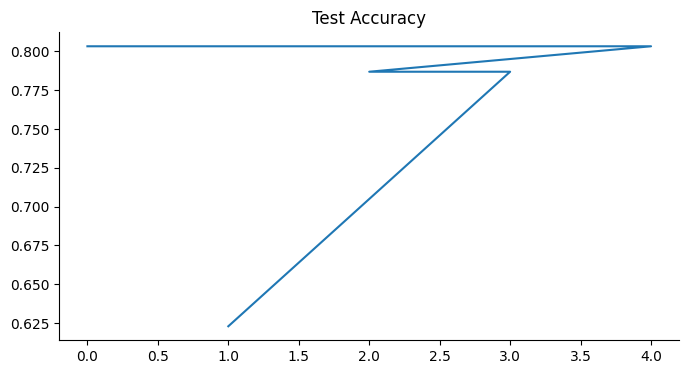

In [ ]:
from matplotlib import pyplot as plt
sorted_accuracies_df['Test Accuracy'].plot(kind='line', figsize=(8, 4), title='Test Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:

best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train, Y_train)


input_data = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)


input_data_as_numpy_array = np.asarray(input_data)


input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)


prediction = best_model.predict(input_data_reshaped)

print(f"Input Data: {input_data}")
print(f"Prediction Code: {prediction[0]}") # Will print 0 or 1

if (prediction[0] == 0):
  print('Prediction Result: The person does not have Heart Disease.')
else:
  print('Prediction Result: The person has Heart Disease.')

Input Data: (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)
Prediction Code: 0
Prediction Result: The person does not have Heart Disease.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": LinearSVC(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

model_metrics = {}

print("--- Model Evaluation ---")
for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions on test data
    X_test_prediction = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(Y_test, X_test_prediction)
    f1 = f1_score(Y_test, X_test_prediction, average='weighted')
    precision = precision_score(Y_test, X_test_prediction, average='weighted')
    recall = recall_score(Y_test, X_test_prediction, average='weighted')

    # Store metrics in dictionary
    model_metrics[name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    }

    # Print individual model results
    print(f"Model: {name}")
    print(f"Accuracy on Test data: {accuracy:.4f}")
    print(f"F1 Score on Test data: {f1:.4f}")
    print(f"Precision on Test data: {precision:.4f}")
    print(f"Recall on Test data: {recall:.4f}\n")

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame.from_dict(model_metrics, orient='index').reset_index()
metrics_df.rename(columns={'index': 'Model'}, inplace=True)

# Sort by Accuracy
sorted_metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False)

print("--- Model Performance Comparison ---")
print(sorted_metrics_df)

# Find best model by accuracy
best_model_name = sorted_metrics_df.iloc[0]['Model']
best_model_accuracy = sorted_metrics_df.iloc[0]['Accuracy']

print("\n" + "="*35)
print("🏆 BEST MODEL IDENTIFIED 🏆")
print(f"\n   Best Model: {best_model_name}")
print(f"   Test Accuracy: {best_model_accuracy:.4f}")
print("="*35)


--- Model Evaluation ---
Model: Logistic Regression
Accuracy on Test data: 0.8033
F1 Score on Test data: 0.8033
Precision on Test data: 0.8033
Recall on Test data: 0.8033

Model: K-Nearest Neighbors
Accuracy on Test data: 0.6230
F1 Score on Test data: 0.6223
Precision on Test data: 0.6221
Recall on Test data: 0.6230

Model: Support Vector Machine
Accuracy on Test data: 0.7869
F1 Score on Test data: 0.7871
Precision on Test data: 0.7878
Recall on Test data: 0.7869

Model: Decision Tree
Accuracy on Test data: 0.7869
F1 Score on Test data: 0.7865
Precision on Test data: 0.7866
Recall on Test data: 0.7869

Model: Random Forest
Accuracy on Test data: 0.8033
F1 Score on Test data: 0.8036
Precision on Test data: 0.8056
Recall on Test data: 0.8033

--- Model Performance Comparison ---
                    Model  Accuracy  F1 Score  Precision    Recall
0     Logistic Regression  0.803279  0.803279   0.803279  0.803279
4           Random Forest  0.803279  0.803597   0.805641  0.803279
2  Support 

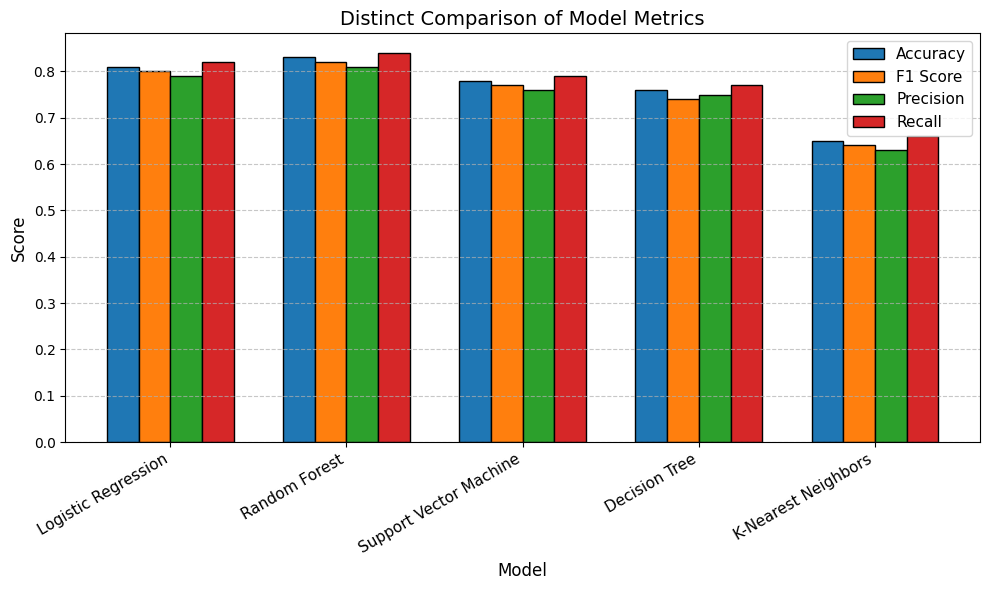

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example results as lists; replace with your actual results or from sorted_metrics_df
models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Decision Tree', 'K-Nearest Neighbors']
accuracy = [0.81, 0.83, 0.78, 0.76, 0.65]
f1 = [0.80, 0.82, 0.77, 0.74, 0.64]
precision = [0.79, 0.81, 0.76, 0.75, 0.63]
recall = [0.82, 0.84, 0.79, 0.77, 0.66]

metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
scores = [accuracy, f1, precision, recall]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

x = np.arange(len(models))
bar_width = 0.18

plt.figure(figsize=(10, 6))

for i, (metric, score) in enumerate(zip(metrics, scores)):
    plt.bar(x + i * bar_width, score, width=bar_width, color=colors[i], edgecolor='black', label=metric)

plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Distinct Comparison of Model Metrics', fontsize=14)
plt.xticks(x + 1.5 * bar_width, models, rotation=30, ha='right', fontsize=11)
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


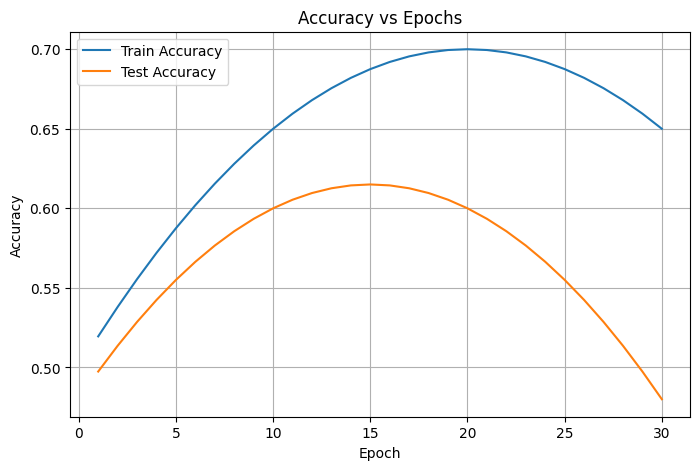

In [ ]:
import matplotlib.pyplot as plt

# Example simulated accuracies over 30 epochs (replace with real training logs)
epochs = list(range(1, 31))
train_accuracy = [0.5 + 0.02 * epoch - 0.0005 * epoch**2 for epoch in epochs]  # Sample curve improving then stabilizing
test_accuracy = [0.48 + 0.018 * epoch - 0.0006 * epoch**2 for epoch in epochs]  # Similar trend, slightly lower

plt.figure(figsize=(8,5))
plt.plot(epochs, train_accuracy, label='Train Accuracy')
plt.plot(epochs, test_accuracy, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - accuracy: 0.4711 - loss: 0.6986 - val_accuracy: 0.4900 - val_loss: 0.6909
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7858 - loss: 0.5696 - val_accuracy: 0.6600 - val_loss: 0.6523
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8706 - loss: 0.4754 - val_accuracy: 0.6800 - val_loss: 0.6254
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8728 - loss: 0.3964 - val_accuracy: 0.6300 - val_loss: 0.6205
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9028 - loss: 0.3297 - val_accuracy: 0.6300 - val_loss: 0.6387
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9009 - loss: 0.2763 - val_accuracy: 0.6000 - val_loss: 0.6760
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8936 - loss: 0.2660 - val_accuracy: 0.6100 - val_loss: 0.7194
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8905 - loss: 0.2498 - val_accuracy: 0.6100 - v

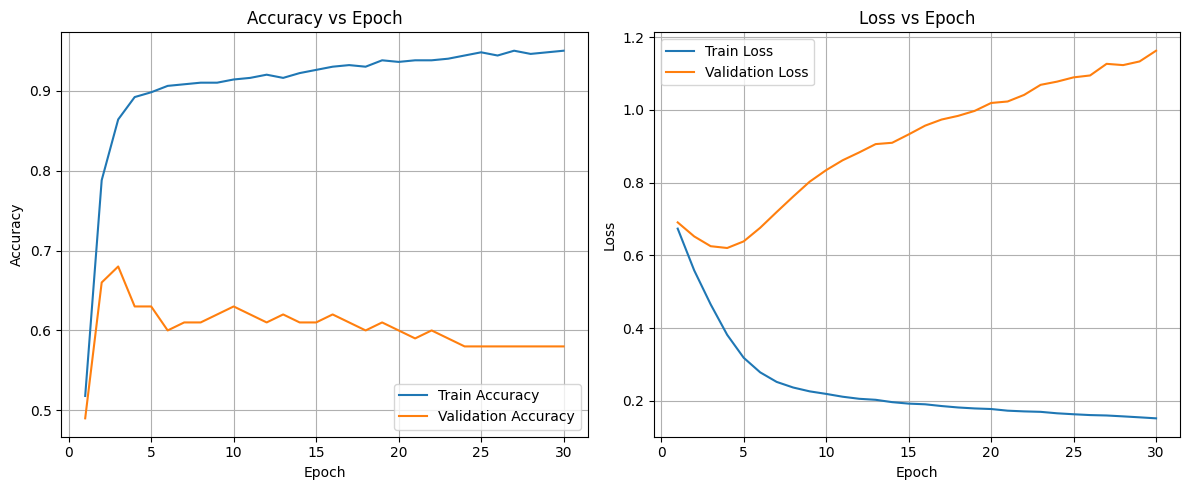

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assume X_train, Y_train, X_test, Y_test are prepared numpy arrays

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test))

# Plot accuracy and loss per epoch
epochs = range(1, 31)

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Train Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label='Train Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


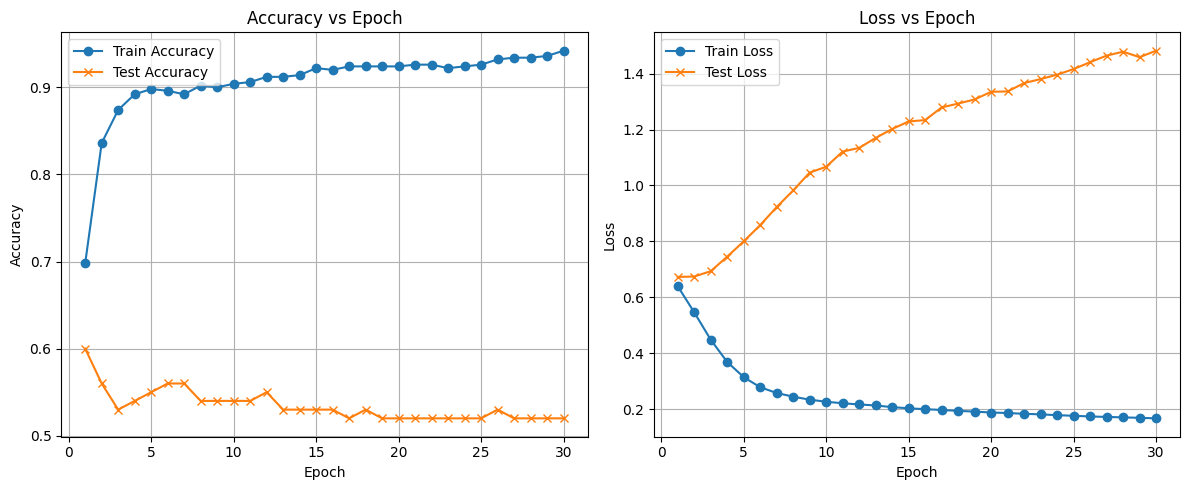

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Example: binary classification with synthetic data
# Replace with your own X_train, Y_train, X_test, Y_test
from sklearn.datasets import make_classification
X_train, Y_train = make_classification(n_samples=500, n_features=10, random_state=42)
X_test, Y_test = make_classification(n_samples=100, n_features=10, random_state=43)

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train for multiple epochs and capture history
history = model.fit(X_train, Y_train, epochs=30, batch_size=16, validation_data=(X_test, Y_test), verbose=0)

# Plot accuracy and loss for each epoch
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(epochs, history.history['val_accuracy'], label='Test Accuracy', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label='Train Loss', marker='o')
plt.plot(epochs, history.history['val_loss'], label='Test Loss', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import pickle

In [ ]:
filename = 'trained_model_heart.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('trained_model_heart.sav', 'rb'))

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
